In [1]:
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
import db.knowhere_db as kdb
import pipeline.pipeline as pipeline
import time
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
reader = kdb.Reader('knowhere')
emil_GPS = reader.get_dataframe_pivoted(collection='iphone_test',username='emil',sensor='GPS')
emil_GPS = emil_GPS[['GPS (Altitude)','GPS (Latitude)','GPS (Longitude)']].astype(float)

In [3]:
data_scaled = preprocessing.scale(emil_GPS)
h_clustering = AgglomerativeClustering()
h_clustering.set_params(n_clusters = 4)
h_clustering.fit(data_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=4,
            pooling_func=<function mean at 0x1065af140>)

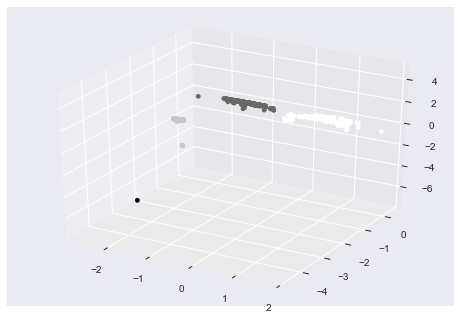

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c = h_clustering.labels_, alpha = 1.0)

In [5]:
reader = kdb.Reader('knowhere')
emil_nonGPS = reader.get_dataframe_pivoted(collection='iphone_test',username='emil')

In [6]:
emil_nonGPS = emil_nonGPS[['Acceleration (x)', 'Acceleration (y)', 'Acceleration (z)', 'Attitude (Pitch)',\
                           'Attitude (Quarternion w)', 'Attitude (Quarternion x)', 'Attitude (Quarternion y)',\
                           'Attitude (Quarternion z)','Attitude (Roll)', 'Attitude (Yaw)',\
                           'Compass (Heading (Magnetic North))', 'Compass (Heading (True North))',\
                           'Compass (x)', 'Compass (y)', 'Compass (z)', 'Gravity (x)', 'Gravity (y)',\
                           'Gravity (z)', 'Gyrometer (x)', 'Gyrometer (y)', 'Gyrometer (z)',\
                           'Magnetometer (raw) (x)', 'Magnetometer (raw) (y)', 'Magnetometer (raw) (z)',\
                           'Microphone (Left Channel Level)', 'Microphone (Right Channel Level)']]

In [7]:
print len(emil_nonGPS)
emil_nonGPS = emil_nonGPS.dropna()
np.sum(emil_nonGPS.isnull())
print len(emil_nonGPS)

4661
51


In [8]:
data_scaled2 = preprocessing.scale(emil_nonGPS)
h_clustering = AgglomerativeClustering()
h_clustering.set_params(n_clusters = 4)
h_clustering.fit(data_scaled2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=4,
            pooling_func=<function mean at 0x1065af140>)

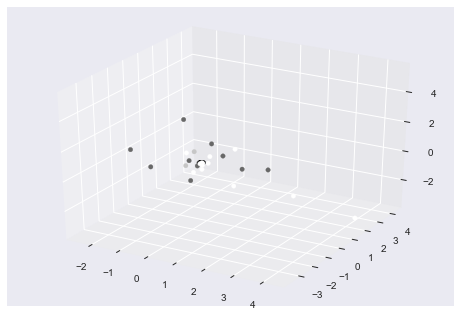

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_scaled2[:, 0], data_scaled2[:, 1], data_scaled2[:, 2], c = h_clustering.labels_, alpha = 1.0)

In [10]:
data = pipeline.read_single_csv('./emil_combined.csv')
data_clean = pipeline.clean_iphone_data(data)
data_clean.reset_index(inplace=True)
data_clean.drop_duplicates(subset=['sensor','data_name','timestamp','action'],keep='first',inplace=True)
data_pivoted = data_clean.pivot_table(index=['timestamp', 'action'], columns=['data_name'], values='data_raw', aggfunc=np.median)
data_pivoted.reset_index(level='action', inplace=True)
data = data_pivoted

In [11]:
data_action = data[['action']]
data_action
data_sub = data[['Latitude','Longitude']]
data_scaled = preprocessing.scale(data_sub)
data_scaled
h_clustering = AgglomerativeClustering()
h_clustering.set_params(n_clusters = 3)
h_clustering.fit(data_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=3,
            pooling_func=<function mean at 0x1065af140>)

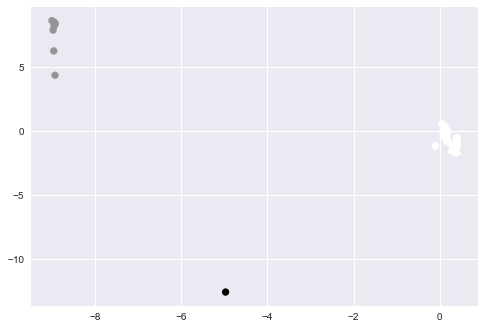

In [12]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c = h_clustering.labels_, alpha = 1.0)

In [13]:
data_sub1 = data_sub.assign(Cluster=pd.Series(h_clustering.labels_).values)
data_sub1
new_data = pd.merge(data_sub1,data_action, left_index=True, right_index=True)
new_data

data_name,Latitude,Longitude,Cluster,action
timestamp,,,,
2017-03-08 10:38:48,40.753039,-73.993500,0,break
2017-03-08 10:38:49,40.753039,-73.993500,0,break
2017-03-08 10:38:50,40.753039,-73.993500,0,break
2017-03-08 10:38:51,40.753039,-73.993500,0,break
2017-03-08 10:38:52,40.753039,-73.993500,0,break
2017-03-08 10:38:53,40.753039,-73.993500,0,break
2017-03-08 10:38:54,40.753039,-73.993500,0,break
2017-03-08 12:14:23,40.753168,-73.993483,0,at_nycdsa
2017-03-08 12:49:23,40.754632,-73.993777,0,lunch


In [14]:
new_data.groupby(['Cluster','action']).agg('count')

data_name                Latitude  Longitude
Cluster action                              
0       alarm_ringing           1          1
        arrive_brooklyn         2          2
        at_nycdsa            1762       1762
        break                  13         13
        leave_nycdsa            7          7
        lunch                   1          1
1       alarm_ringing           2          2
        arrive_brooklyn         2          2
        at_nycdsa               1          1
        go_to_bed               2          2
        in_apartment            1          1
        leave_apartment         5          5
        out_of_bed              3          3
        zzz                     6          6
2       leave_nycdsa            1          1

In [41]:
data_action = data[['action']]
data_action
data_sub = data[['Latitude','Longitude']]
data_scaled = preprocessing.scale(data_sub)
data_scaled
h_clustering = AgglomerativeClustering()
h_clustering.set_params(n_clusters = 4, linkage='complete')
h_clustering.fit(data_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete',
            memory=Memory(cachedir=None), n_clusters=4,
            pooling_func=<function mean at 0x1065af140>)

In [42]:
data_sub2 = data_sub.assign(Cluster=pd.Series(h_clustering.labels_).values)
data_sub2
new_data = pd.merge(data_sub2,data_action, left_index=True, right_index=True)
new_data
new_data.groupby(['Cluster','action']).agg('count')

data_name                Latitude  Longitude
Cluster action                              
0       alarm_ringing           1          1
        arrive_brooklyn         2          2
        at_nycdsa            1762       1762
        break                  13         13
        leave_nycdsa            7          7
        lunch                   1          1
1       alarm_ringing           2          2
        arrive_brooklyn         2          2
        at_nycdsa               1          1
        go_to_bed               2          2
        in_apartment            1          1
        leave_apartment         5          5
        out_of_bed              3          3
        zzz                     4          4
2       zzz                     2          2
3       leave_nycdsa            1          1

In [18]:
data_action = data[['action']]
data_action
data_sub = data[['Latitude','Longitude']]
data_scaled = preprocessing.scale(data_sub)
data_scaled
h_clustering = AgglomerativeClustering()
h_clustering.set_params(n_clusters = 3, linkage='average')
h_clustering.fit(data_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average',
            memory=Memory(cachedir=None), n_clusters=3,
            pooling_func=<function mean at 0x1065af140>)

In [19]:
data_sub2 = data_sub.assign(Cluster=pd.Series(h_clustering.labels_).values)
data_sub2
new_data = pd.merge(data_sub2,data_action, left_index=True, right_index=True)
new_data
new_data.groupby(['Cluster','action']).agg('count')

data_name                Latitude  Longitude
Cluster action                              
0       alarm_ringing           2          2
        arrive_brooklyn         2          2
        at_nycdsa               1          1
        go_to_bed               2          2
        in_apartment            1          1
        leave_apartment         5          5
        out_of_bed              3          3
        zzz                     6          6
1       leave_nycdsa            1          1
2       alarm_ringing           1          1
        arrive_brooklyn         2          2
        at_nycdsa            1762       1762
        break                  13         13
        leave_nycdsa            7          7
        lunch                   1          1

In [21]:
data_action = data[['action']]
data_action
data_sub = data[['Latitude','Longitude']]
data_scaled = preprocessing.scale(data_sub)
data_scaled
h_clustering = AgglomerativeClustering()
h_clustering.set_params(n_clusters = 3, linkage='average', affinity='manhattan')
h_clustering.fit(data_scaled)

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
            connectivity=None, linkage='average',
            memory=Memory(cachedir=None), n_clusters=3,
            pooling_func=<function mean at 0x1065af140>)

In [22]:
data_sub2 = data_sub.assign(Cluster=pd.Series(h_clustering.labels_).values)
data_sub2
new_data = pd.merge(data_sub2,data_action, left_index=True, right_index=True)
new_data
new_data.groupby(['Cluster','action']).agg('count')

data_name                Latitude  Longitude
Cluster action                              
0       alarm_ringing           2          2
        arrive_brooklyn         2          2
        at_nycdsa               1          1
        go_to_bed               2          2
        in_apartment            1          1
        leave_apartment         5          5
        out_of_bed              3          3
        zzz                     6          6
1       leave_nycdsa            1          1
2       alarm_ringing           1          1
        arrive_brooklyn         2          2
        at_nycdsa            1762       1762
        break                  13         13
        leave_nycdsa            7          7
        lunch                   1          1

In [23]:
data_action = data[['action']]
data_action
data_sub = data[['Latitude','Longitude']]
data_scaled = preprocessing.scale(data_sub)
data_scaled
h_clustering = AgglomerativeClustering()
h_clustering.set_params(n_clusters = 3, linkage='average', affinity='cosine')
h_clustering.fit(data_scaled)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='average',
            memory=Memory(cachedir=None), n_clusters=3,
            pooling_func=<function mean at 0x1065af140>)

In [24]:
data_sub2 = data_sub.assign(Cluster=pd.Series(h_clustering.labels_).values)
data_sub2
new_data = pd.merge(data_sub2,data_action, left_index=True, right_index=True)
new_data
new_data.groupby(['Cluster','action']).agg('count')

data_name                Latitude  Longitude
Cluster action                              
0       alarm_ringing           1          1
        arrive_brooklyn         2          2
        at_nycdsa            1083       1083
        break                  13         13
        leave_nycdsa            8          8
        lunch                   1          1
1       at_nycdsa             679        679
2       alarm_ringing           2          2
        arrive_brooklyn         2          2
        at_nycdsa               1          1
        go_to_bed               2          2
        in_apartment            1          1
        leave_apartment         5          5
        out_of_bed              3          3
        zzz                     6          6

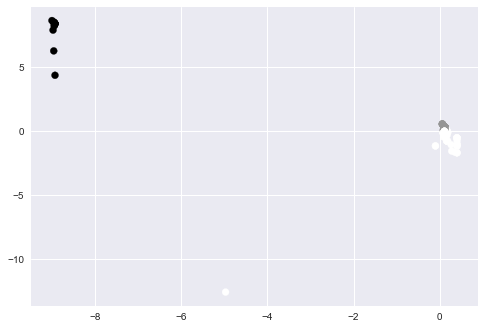

In [25]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c = h_clustering.labels_, alpha = 1.0)

In [40]:
from sklearn.cluster import DBSCAN
data_action = data[['action']]
data_action
data_sub = data[['Latitude','Longitude']]
data_scaled = preprocessing.scale(data_sub)
data_scaled
h_clustering = DBSCAN()
h_clustering.set_params(eps=0.4, min_samples=6)
h_clustering.fit(data_scaled)
data_sub2 = data_sub.assign(Cluster=pd.Series(h_clustering.labels_).values)
data_sub2
new_data = pd.merge(data_sub2,data_action, left_index=True, right_index=True)
new_data
new_data.groupby(['Cluster','action']).agg('count')

data_name                Latitude  Longitude
Cluster action                              
-1      leave_nycdsa            1          1
        zzz                     2          2
 0      alarm_ringing           1          1
        arrive_brooklyn         2          2
        at_nycdsa            1762       1762
        break                  13         13
        leave_nycdsa            7          7
        lunch                   1          1
 1      alarm_ringing           2          2
        arrive_brooklyn         2          2
        at_nycdsa               1          1
        go_to_bed               2          2
        in_apartment            1          1
        leave_apartment         5          5
        out_of_bed              3          3
        zzz                     4          4

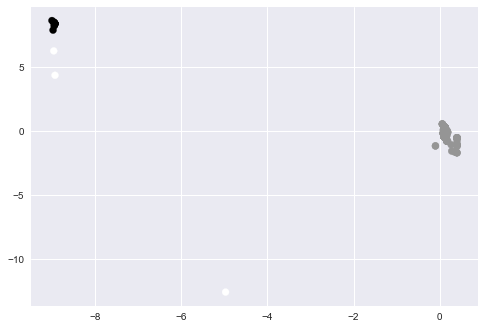

In [38]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c = h_clustering.labels_, alpha = 1.0)

In [ ]:
from sklearn import preprocessing

data_scaled = preprocessing.scale(data_sub)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)

from sklearn.cluster import AgglomerativeClustering
h_clustering = AgglomerativeClustering()
h_clustering.set_params(n_clusters = 4)
h_clustering.fit(data_scaled)

import pickle
s = pickle.dumps(h_clustering)
hierarchical_clustering = pickle.loads(s)
data_scaled = preprocessing.scale(data_sub)
hierarchical_clustering.predict(data_scaled)


